<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/face-recognization/facecutting_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


[271 729]
709 709 1148
463 501


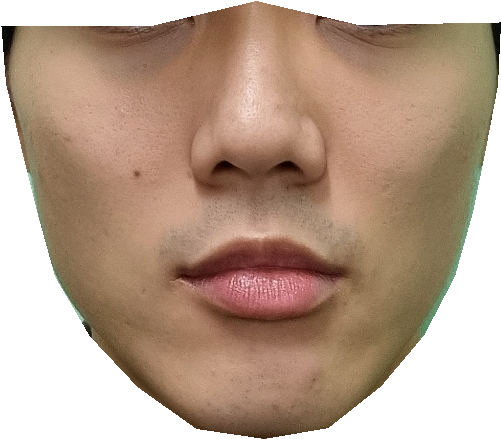

In [35]:
from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import dlib
import cv2
import os


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/gdrive/MyDrive/opencv/shape_predictor_68_face_landmarks.dat')

# load image
img = cv2.imread('/gdrive/MyDrive/opencv/face5.jpg')
#img = imutils.resize(img, width=300)

h, w, ch = img.shape
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# add an alpha channel to image
b,g,r = cv2.split(img);
a = np.ones((h,w,1), np.uint8) * 255
img = cv2.merge((b, g, r, a))


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# detect face
rects = detector(gray,1)
roi = rects[0] # region of interest
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)

# extract jawline
jawline = shape[0:17]
lefteye = shape[36:42]
righteye = shape[42:48]

nose = shape[27][1]

top = nose
bottom = max(jawline[:,1])
side1 = min(jawline[:,0])
side2 = max(jawline[:,0])
side = side2-side1

lefteyeline = max(lefteye[:,1])
righteyeline = max(righteye[:,1])


# extend contour for masking
jawline = np.append(jawline, [ w-1, shape[42][1]]).reshape(-1, 2)
jawline = np.append(jawline, [shape[47][0],shape[47][1]]).reshape(-1,2)
jawline = np.append(jawline, [shape[27][0],shape[27][1]]).reshape(-1,2)
jawline = np.append(jawline, [ w-1, nose]).reshape(-1,2)
jawline = np.append(jawline, [ w-1, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [0, nose]).reshape(-1,2)
jawline = np.append(jawline, [shape[27][0],shape[27][1]]).reshape(-1,2)
jawline = np.append(jawline, [shape[40][0],shape[40][1]]).reshape(-1,2)
jawline = np.append(jawline, [ 0, shape[40][1] ]).reshape(-1, 2)
contours = [ jawline ]

# generate mask
mask = np.ones((h,w,1), np.uint8) * 255 # times 255 to make mask 'showable'
cv2.drawContours(mask, contours, -1, 0, -1) # remove below jawline
# apply to image
result = cv2.bitwise_and(img, img, mask = mask)
result = result[nose:bottom, side1:side2] # crop ROI
cv2.imwrite('/gdrive/MyDrive/result.png', result); 
print(jawline[0])
print(nose, top, bottom)
print(roi.width(), side)

cv2_imshow(result)
